1. What is unsupervised learning in the context of machine learning?

    Unsupervised learning is a type of machine learning where the model is trained on data without labeled outcomes. The goal is to discover hidden patterns or groupings within the data. In clustering, unsupervised learning algorithms try to group similar data points together based on features.

2. How does the K-Means clustering algorithm work?

    K-Means works in these steps:
    
    ->Choose the number of clusters K
    ->Randomly initialize k cluster centroids.
    ->Assign each data point to the nearest centroid.
    ->Update centroids based on the mean of the assigned points.
    ->Repeat steps 3–4 until centroids no longer change (convergence).

3. Explain the concept of a dendrogram in hierarchical clustering.

    A dendrogram is a tree-like diagram that records the merging or splitting of clusters at different levels in hierarchical clustering. It helps visualize how data points are grouped and at what distance threshold clusters are formed.

4. What is the main difference between K-Means and Hierarchical Clustering?

    K-Means requires the number of clusters in advance and partitions data using centroids.
    
    Hierarchical Clustering builds a hierarchy (tree) of clusters and does not require pre-specifying the number of clusters (though it can be cut at a certain level to form clusters).

6. What are the advantages of DBSCAN over K-Means?
    
    ->Can find arbitrarily shaped clusters.
    ->No need to specify the number of clusters.
    ->Identifies noise points (outliers).
    ->Works well with clusters of varying densities.

7. When would you use Silhouette Score in clustering?

    Silhouette Score measures how well a point fits in its assigned cluster compared to other clusters. It’s used to:
    ->Evaluate clustering quality.
    ->Help choose the optimal number of clusters.

8. What are the limitations of Hierarchical Clustering?

    ->Computationally expensive for large datasets.
    ->Irreversible merging (once merged, clusters can’t be split).
    ->Sensitive to noisy data and outliers.

9. Why is feature scaling important in clustering algorithms like K-Means?

    Clustering algorithms like K-Means use distance measures (like Euclidean distance). If features are on different scales, larger-scaled features can dominate the clustering process. Feature scaling (e.g., StandardScaler, MinMaxScaler) ensures fair contribution from all features.

10. How does DBSCAN identify noise points?

    DBSCAN labels a point as noise if:
        It’s not a core point (doesn't have enough neighbors within eps distance).
    And not reachable from any core point. These are outliers that don’t belong to any cluster.

11. Define inertia in the context of K-Means.
    
    Inertia is the sum of squared distances between data points and their assigned cluster centroids. Lower inertia indicates tighter clusters. It’s used to evaluate clustering quality (especially in the elbow method).

12. What is the elbow method in K-Means clustering?
    
    The elbow method helps choose the optimal number of clusters k by:
    ->Plotting the inertia vs. number of clusters.
    ->The “elbow point” (where the rate of decrease slows down) is considered the best K

13. Describe the concept of "density" in DBSCAN.

    Density in DBSCAN is defined by:
    ->eps (epsilon): The maximum distance for two points to be considered neighbors.
    ->min_samples: Minimum number of points within eps to form a dense region (core point). Clusters form where dense regions are connected.

14. Can hierarchical clustering be used on categorical data?

    Yes, but not directly. Hierarchical clustering typically uses distance metrics suitable for numerical data.
    For categorical data:
        Use encoding (like one-hot).Or use categorical distance metrics (e.g., Hamming distance).

15. What does a negative Silhouette Score indicate?

    A negative Silhouette Score indicates that a data point is closer to a neighboring cluster than to the cluster it was assigned to. This means the point may be misclassified.

16. Explain the term "linkage criteria" in hierarchical clustering.
    
    Linkage criteria determine how distances between clusters are calculated:
    Single linkage: Min distance between points in two clusters.
    Complete linkage: Max distance.
    Average linkage: Average distance.
    Ward’s method: Minimizes variance within clusters.

17. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

    Because K-Means:
    ->Assumes clusters are spherical and similar in size.
    ->Uses mean-based assignment, which struggles with non-uniform densities or shapes.
    ->May split or merge clusters incorrectly if they vary too much.

18. What are the core parameters in DBSCAN, and how do they influence clustering?

    eps: Neighborhood radius. Too small = many small clusters, too big = merges everything.
    
    min_samples: Minimum points to form a cluster. Affects what is considered noise. Both together define density.

18. How does K-Means++ improve upon standard K-Means initialization?
    
    K-Means++:
    ->Improves centroid initialization by choosing spread-out initial centers.
    ->Reduces the chance of poor clustering.
    ->Helps the algorithm converge faster and more accurately.

19. What is agglomerative clustering?

    Agglomerative clustering is a bottom-up hierarchical method:
    ->Starts with each point as its own cluster.
    ->Merges the closest pairs of clusters repeatedly.
    ->Continues until a stopping condition is met (e.g., desired number of clusters).

20. What makes Silhouette Score a better metric than just inertia for model evaluation?
    
    ->Inertia only decreases with more clusters and can be misleading.
    ->Silhouette Score balances cohesion and separation of clusters.
    ->It gives a more intuitive, interpretable value (between -1 and 1)

Silhouette Score: 0.678738720085253


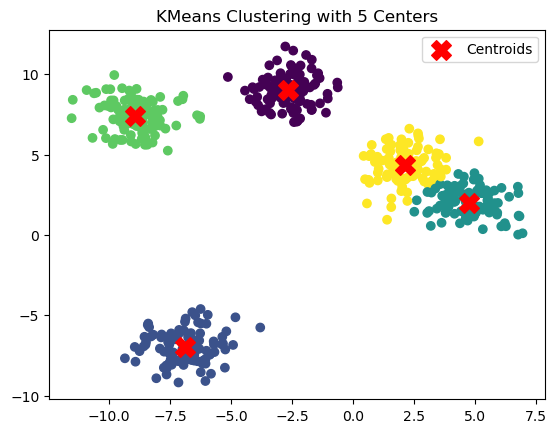

In [1]:
#21)Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate data
X, y = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluate with Silhouette Score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering with 5 Centers")
plt.legend()
plt.show()


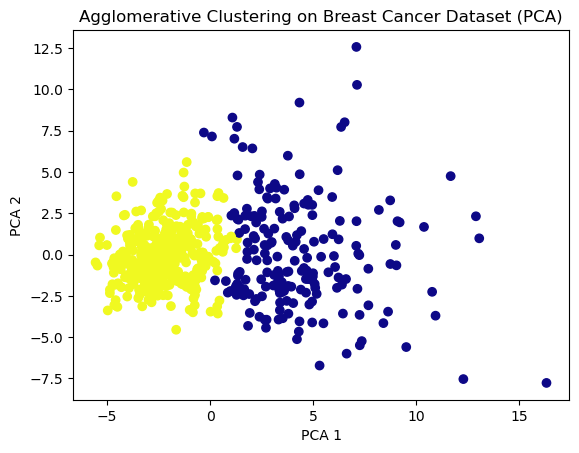

In [3]:
#22)Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load and scale data
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

# PCA for 2D visualization
X_pca = PCA(n_components=2).fit_transform(X)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma')
plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


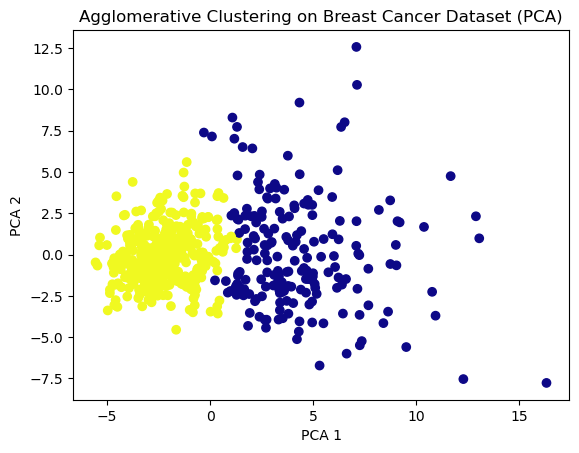

In [5]:
#23)Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load and scale data
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

# PCA for 2D visualization
X_pca = PCA(n_components=2).fit_transform(X)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma')
plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


C:\Users\RGUKT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


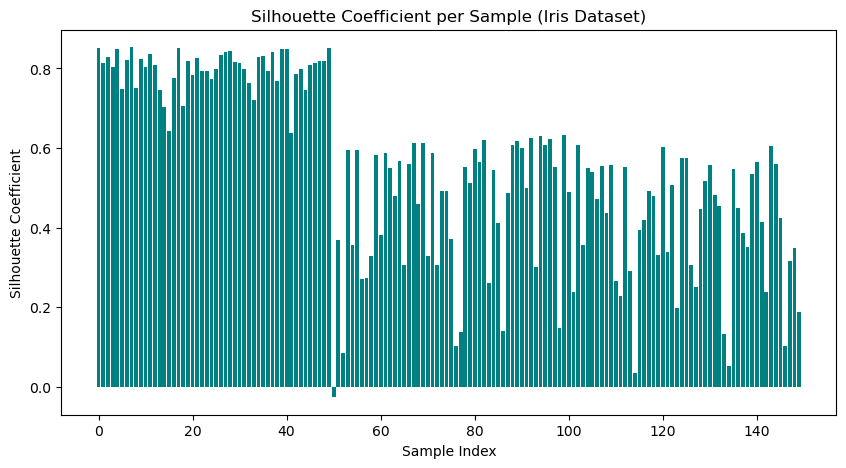

In [6]:
#24)Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load data
iris = load_iris()
X = iris.data

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Silhouette values
sil_values = silhouette_samples(X, labels)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.bar(range(len(sil_values)), sil_values, color='teal')
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient per Sample (Iris Dataset)")
plt.show()


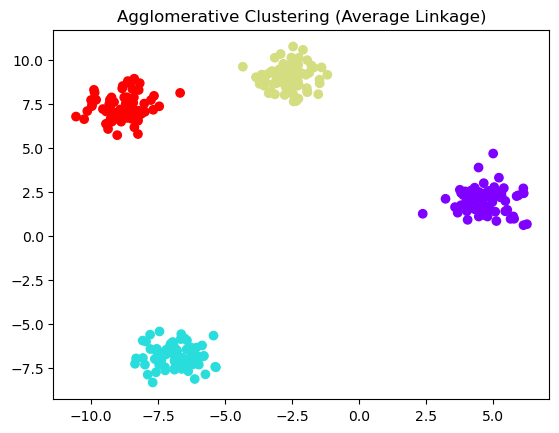

In [7]:
#25)Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Agglomerative clustering with average linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


C:\Users\RGUKT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


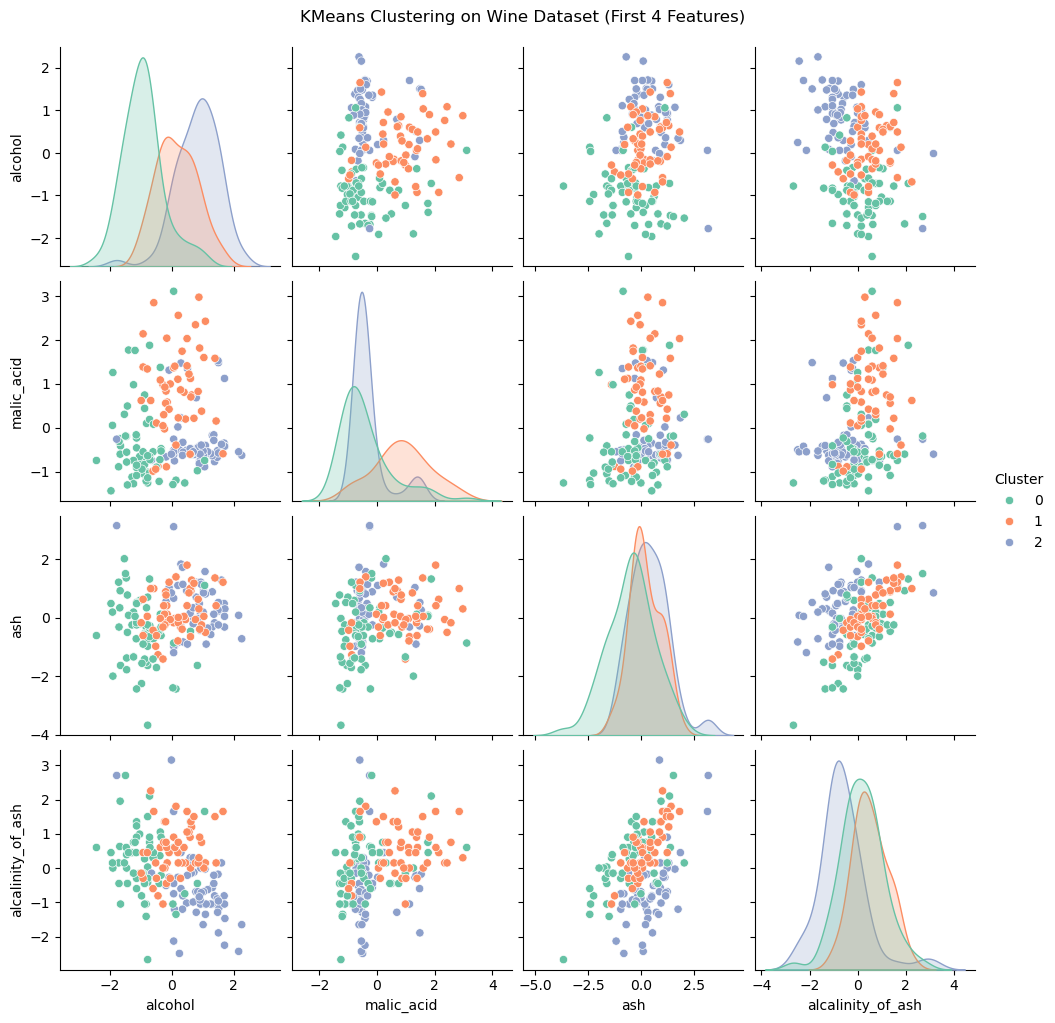

In [8]:
#26)Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# Load and prepare data
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=wine.feature_names)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Seaborn pairplot
sns.pairplot(df_scaled.iloc[:, :4].join(df_scaled['Cluster']), hue='Cluster', palette='Set2')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


In [9]:
#27)enerate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from collections import Counter

# Generate data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Add noise
X = StandardScaler().fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Count clusters (excluding noise = -1)
counts = Counter(labels)
print("Cluster Counts (including noise):", counts)
print("Number of clusters (excluding noise):", len(set(labels)) - (1 if -1 in labels else 0))
print("Number of noise points:", list(labels).count(-1))


Cluster Counts (including noise): Counter({0: 250, 1: 125, 2: 125})
Number of clusters (excluding noise): 3
Number of noise points: 0


C:\Users\RGUKT\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


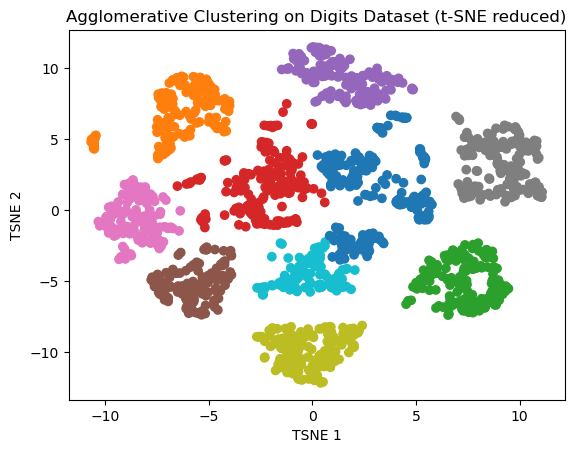

In [10]:
#28)Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load and reduce with t-SNE
digits = load_digits()
X = digits.data
X_tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42).fit_transform(X)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

# Plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE reduced)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()


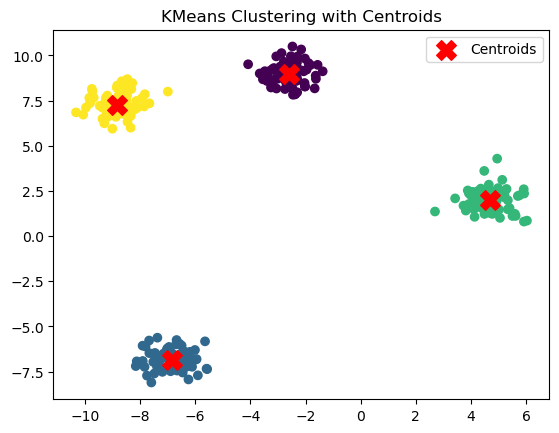

In [11]:
#29)Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot clusters with centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title("KMeans Clustering with Centroids")
plt.legend()
plt.show()


In [12]:
#30Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load and scale data
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Count noise points
noise_points = list(labels).count(-1)
print("Number of noise points:", noise_points)


Number of noise points: 26


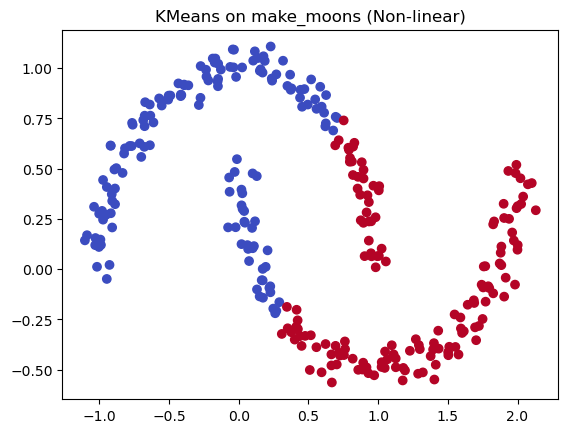

In [13]:
#31)Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("KMeans on make_moons (Non-linear)")
plt.show()


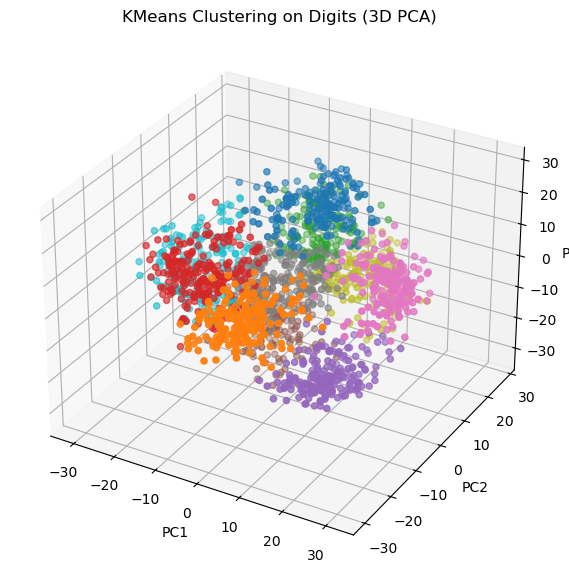

In [14]:
#32)Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load digits data
digits = load_digits()
X = digits.data

# Reduce to 3 components using PCA
X_pca = PCA(n_components=3).fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')
ax.set_title("KMeans Clustering on Digits (3D PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


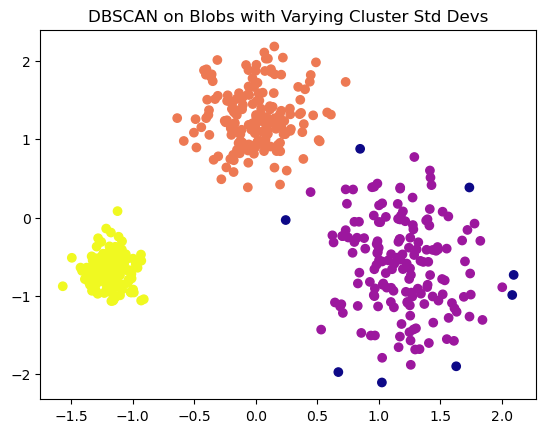

In [16]:
#33)Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate data with different std deviations
X, _ = make_blobs(n_samples=500,
                  centers=[[0, 0], [5, 5], [10, 0]],
                  cluster_std=[0.5, 1.0, 1.5],
                  random_state=42)

# Scale the data
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN on Blobs with Varying Cluster Std Devs")
plt.show()



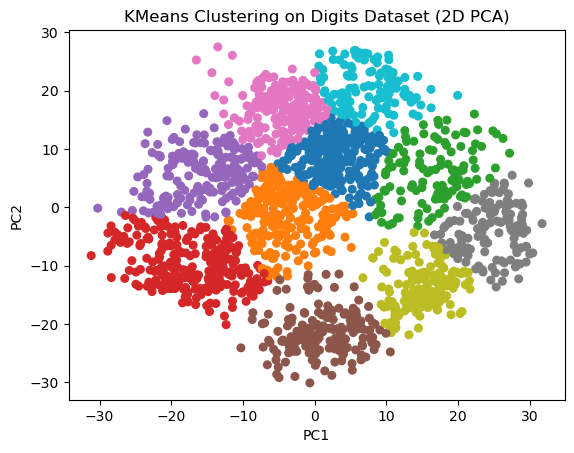

In [17]:
#34)

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
digits = load_digits()
X = digits.data

# Reduce to 2D with PCA
X_pca = PCA(n_components=2).fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
plt.title("KMeans Clustering on Digits Dataset (2D PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


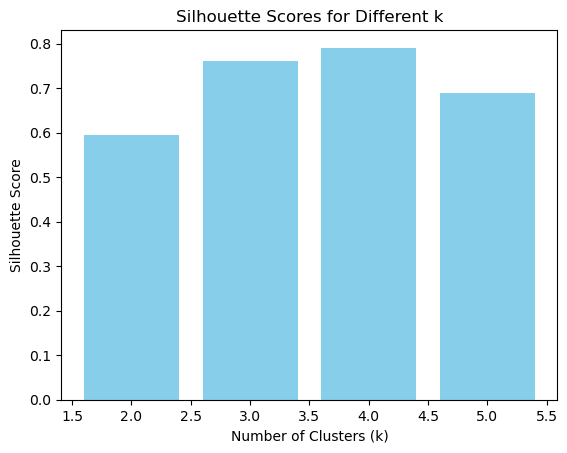

In [18]:
#35)Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Evaluate silhouette scores for k = 2 to 5
scores = []
ks = range(2, 6)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Plot bar chart
plt.bar(ks, scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()



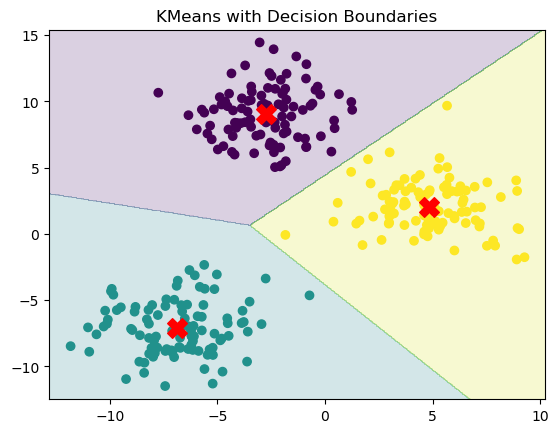

In [20]:
#36) Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate overlapping data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X')
plt.title("KMeans with Decision Boundaries")
plt.show()


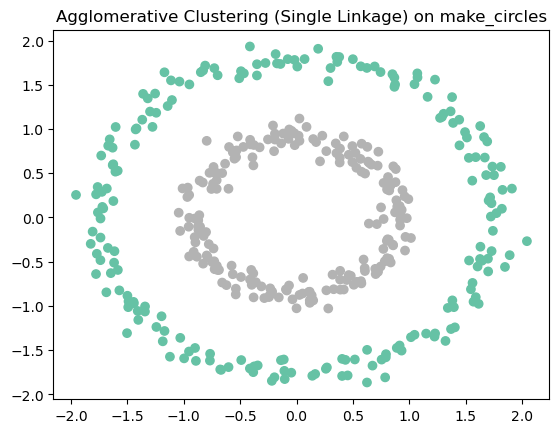

In [21]:
#36) Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate data
X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

# Agglomerative clustering with single linkage
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

# Plot result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2')
plt.title("Agglomerative Clustering (Single Linkage) on make_circles")
plt.show()


In [23]:
#37)Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load and scale data
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

# DBSCAN
db = DBSCAN(eps=1.2, min_samples=5)
labels = db.fit_predict(X)

# Count clusters (excluding noise)
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters (excluding noise):", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters (excluding noise): 0
Number of noise points: 178


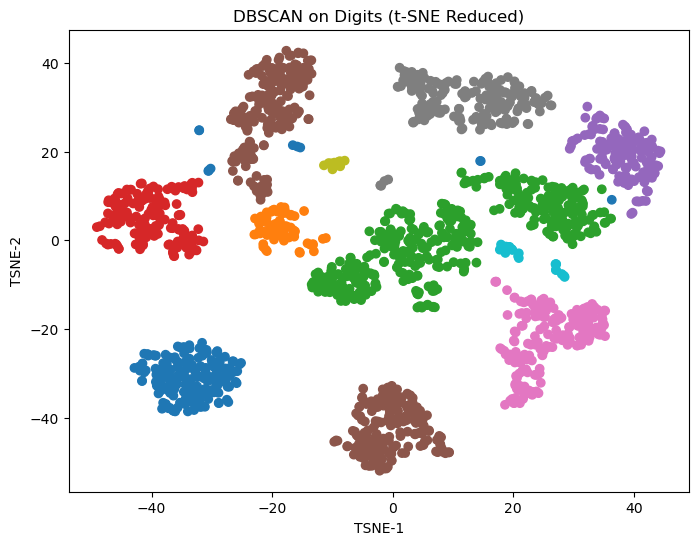

In [24]:
#38)Load the Digits dataset, apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load digits data
digits = load_digits()
X = StandardScaler().fit_transform(digits.data)

# Reduce to 2D with t-SNE
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("DBSCAN on Digits (t-SNE Reduced)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()



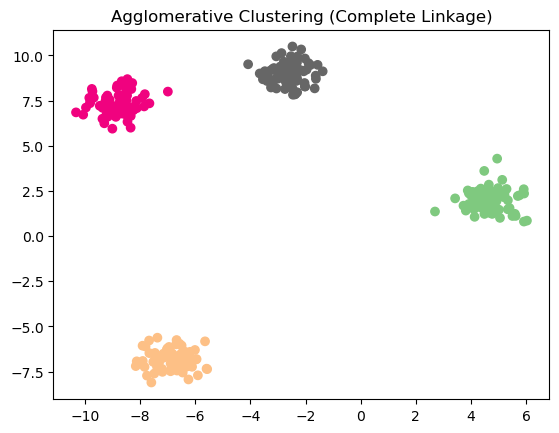

In [25]:
#39)Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Agglomerative Clustering (complete linkage)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


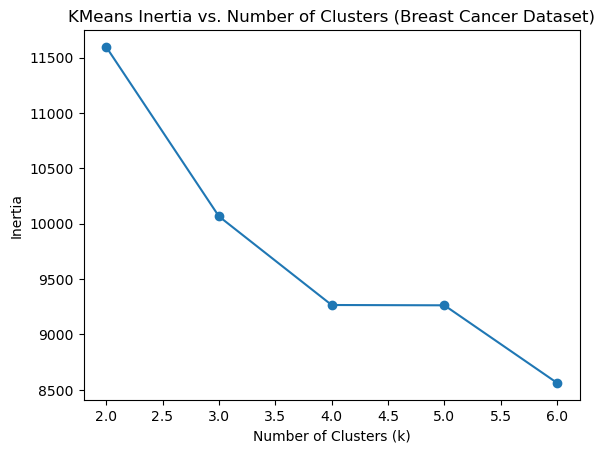

In [26]:
#40)Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and scale data
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

# Compute inertia for K = 2 to 6
inertias = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("KMeans Inertia vs. Number of Clusters (Breast Cancer Dataset)")
plt.show()



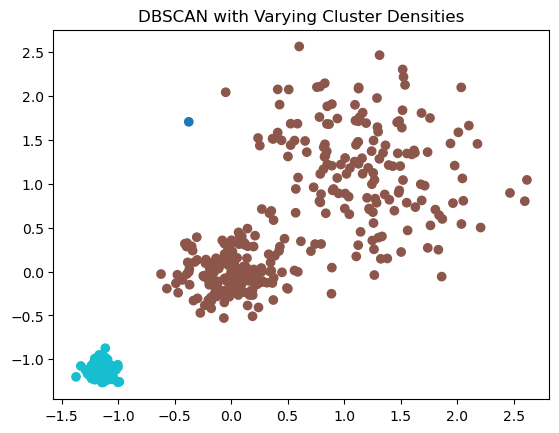

In [27]:
#41) Generate synthetic data with varying cluster standard deviations using make_blobs and cluster with DBSCAN

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate data with different std deviations
X, _ = make_blobs(n_samples=500,
                  centers=[[-5, -5], [0, 0], [5, 5]],
                  cluster_std=[0.3, 1.0, 2.5],
                  random_state=42)

# Scale data
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("DBSCAN with Varying Cluster Densities")
plt.show()


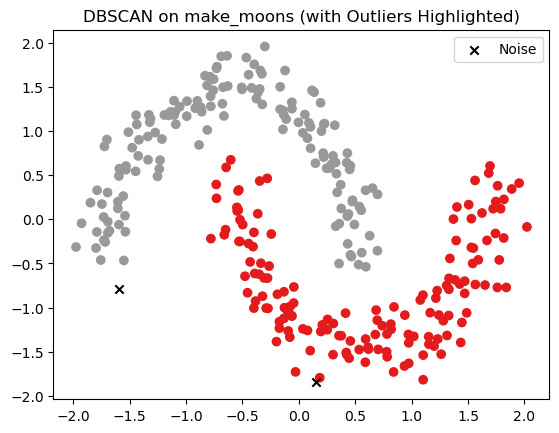

In [28]:
#42)Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Generate data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
X = StandardScaler().fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Mark noise points
noise_mask = labels == -1

# Plot
plt.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=labels[~noise_mask], cmap='Set1')
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='black', marker='x', label='Noise')
plt.title("DBSCAN on make_moons (with Outliers Highlighted)")
plt.legend()
plt.show()



In [29]:
#43) Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load and scale data
data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

# KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Output centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.feature_names)
print("Cluster Centroids (MinMax Scaled Data):\n")
print(centroids.round(2))


Cluster Centroids (MinMax Scaled Data):

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         0.50          0.40            0.51       0.36             0.47   
1         0.26          0.29            0.25       0.14             0.36   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0              0.42            0.42                 0.47           0.46   
1              0.18            0.10                 0.13           0.34   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                    0.30  ...          0.48           0.45             0.47   
1                    0.26  ...          0.21           0.32             0.19   

   worst area  worst smoothness  worst compactness  worst concavity  \
0        0.31              0.50               0.36             0.39   
1        0.10              0.36               0.15             0.13   

   worst concave points  worst symmetry  worst fr

In [30]:
#44)Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load data
iris = load_iris()
X = iris.data

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

# Display first 10 labels
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


In [31]:
#45)Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load and scale
data = load_wine()
X = StandardScaler().fit_transform(data.data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Print size of each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)



Cluster sizes: {0: 65, 1: 51, 2: 62}


C:\Users\RGUKT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


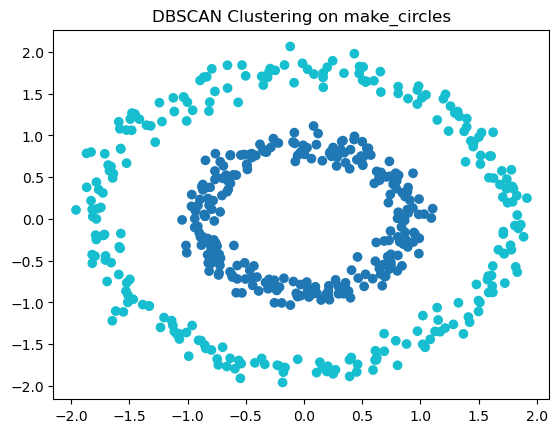

In [32]:
#46)Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate data
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("DBSCAN Clustering on make_circles")
plt.show()


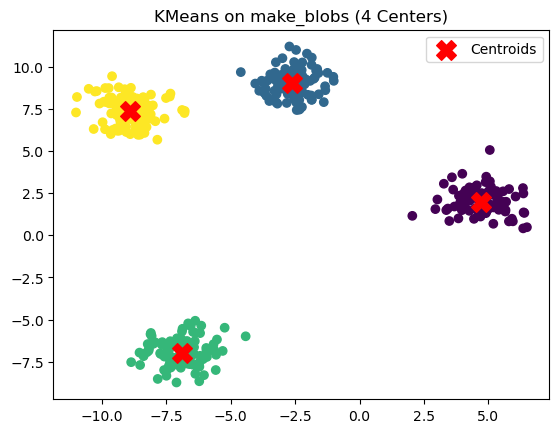

In [33]:
#47)Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.8, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("KMeans on make_blobs (4 Centers)")
plt.legend()
plt.show()

